# Frontend of tai-chi-engine ⭐️
> To fluently empower tai-chi-engine & tai-chi-tuna, play through this notebook will boost your understanding immensely

## tai-chi-tuna

In [1]:
# ! pip install tai-chi-tuna

### Typer
> Build interactions base on **data typing** detail, eg. default calling of ```BOOL``` will return a checkbox class|

* For now typer classes only creates **widgets**, but later on, we can use this to build **streamlit app** or **API** detail (along with doc detail)

In [29]:
from tai_chi_tuna.front.typer import (
    BOOL, FLOAT, INT, STR, LIST
)

#### INT => IntegerSlider

In [ ]:
batch_size = INT(min_=2, max_=64, default=32, step=2)

slider = batch_size()
slider

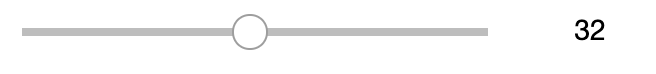

In [24]:
print(batch_size)

int[2-64, :2]=32


In [26]:
slider.value

32

#### BOOL => Checkbox

In [ ]:
use_gpu = BOOL(name='use GPU?', default=True)
use_gpu()

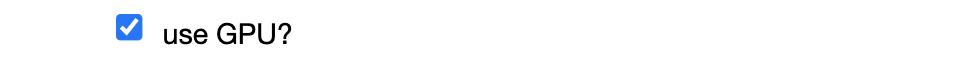

#### STR => Input Box/Textarea

Use the text input version

In [ ]:
project = STR(default='./project',)
project()

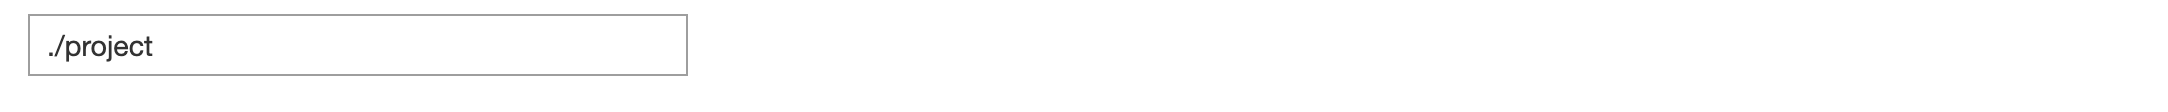

If the text is longer, let's use the **textarea** version

In [ ]:
project = STR(default='./project', use_area=True)
project()

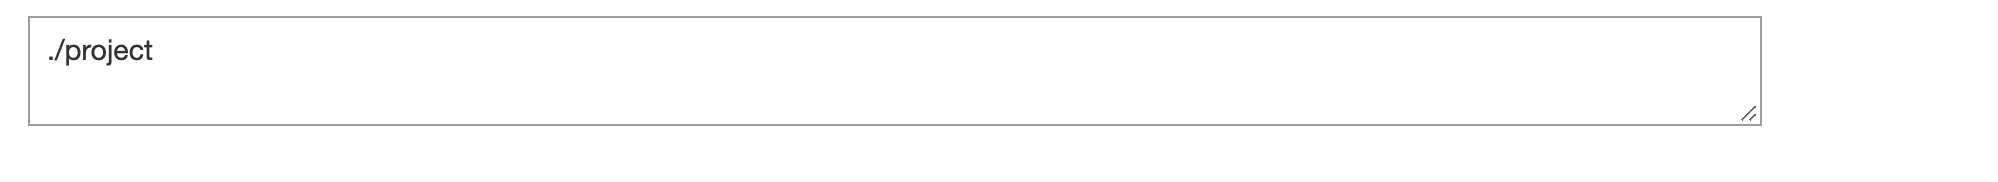

#### FLOAT => Float Slider

In [ ]:
scale = FLOAT(min_=.1, max_=.9, step = .02, default=.16)
scale()

#### LIST => Dropdown

In [ ]:
entry_model = LIST(options = ["ViT", "VGG16","ResNet50"], default="ResNet50")
entry_model()

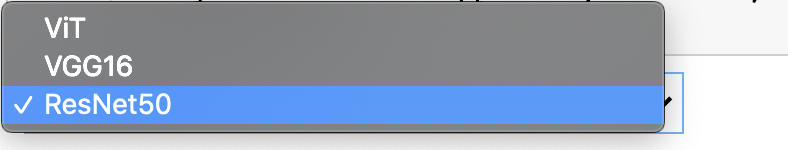

### Interactives widget on ``typed`` function

In [41]:
from tai_chi_tuna.front.widget import InteractiveAnnotations

Now we create a sample function, with the **Typers** you just learnt

In [55]:
def being_loud(
    volumn: INT(default=5) = 3,
    mute: BOOL() = True,
    pitch: LIST(options=["High", "Medium", "Low"])="High"
):
    """
    we just print all the arguements
    """
    print(f"volumn:\t{volumn}\nmute:\t{mute}\npitch:\t{pitch}")

Now we create a combination of interactivesm, with a confirming button

In [ ]:
InteractiveAnnotations.on(callback = being_loud, icon='flask', description='soar')(being_loud)

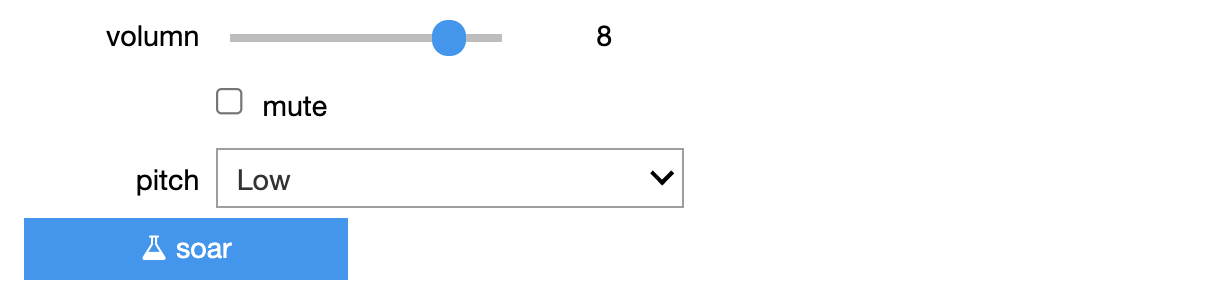

### Structures 

In [40]:
from tai_chi_tuna.front.structure import (
    EditableDict, EditableList, StepByStep
)

#### Editable dictionary

In [79]:
my_dict_config = EditableDict()
my_dict_config

EditableDict(layout=Layout(width='100%'))

data changed to {'answer': [42, 'yes', {'love': ['the earth', 'sun', 'the animals'], 'despise': ['rich', 'rich', 'rich'], 'give alms to': 'every one that asks', 'stand up for': ['the stupid', 'crazy']}]}
assigning data to new_config


I display the whole thing first, then update the dictionary by the following way, the update will be reflected up there

In [80]:
my_dict_config["foo"] = 'bar'
my_dict_config["answer"] = [
    42, "yes",
    {"love": [
        "the earth", "sun", "the animals"
    ],
        "despise":["rich", "rich", "rich"],
        "give alms to": "every one that asks",
        "stand up for":['the stupid', 'crazy'],
    }]

In [81]:
my_dict_config.get_data()

{'foo': 'bar',
 'answer': [42,
  'yes',
  {'love': ['the earth', 'sun', 'the animals'],
   'despise': ['rich', 'rich', 'rich'],
   'give alms to': 'every one that asks',
   'stand up for': ['the stupid', 'crazy']}]}

##### update outside configurations

Use the decorator feature to assign an function to the update event, each time there is a change in the dictionary, the function will be executed

Now let me hit one of the Nah button to delete a row

In [82]:
new_config = dict()
@my_dict_config.on_update
def to_new_config(kwargs):
    print(f"data changed to {kwargs}")
    print(f"assigning data to new_config")
    new_config['kwargs'] = kwargs

In [84]:
new_config

{'kwargs': {'answer': [42,
   'yes',
   {'love': ['the earth', 'sun', 'the animals'],
    'despise': ['rich', 'rich', 'rich'],
    'give alms to': 'every one that asks',
    'stand up for': ['the stupid', 'crazy']}]}}

#### Editable list

In [87]:
my_list = EditableList([{"love": [
        "the earth", "sun", "the animals"
    ],
        "despise":["rich", "rich", "rich"],
        "give alms to": "every one that asks",
        "stand up for":['the stupid', 'crazy'],
    },"another thing"])

In [88]:
my_list

EditableList(children=(HBox(box_style='info', children=(Button(button_style='danger', description='Nah', icon=…

Add new things to the list

In [90]:
my_list = my_list + {"doctor":"who?"}

The ```on_update``` trigger also works for the ```EditableList```

### StepByStep: A progress Axis 

Now we design a dummpy step function

In [91]:
from ipywidgets import interact, HTML
import pandas as pd
def test_step(**kwargs):
    @interact
    def show_step_(how_much=[1,2,4,8,16], charactor = ['🍺', '🏺', '🍶','🍷']):
        return pd.DataFrame({"stuff":[charactor*how_much,]*how_much})
    

In [92]:
sbs = StepByStep(
    {"step1":test_step,"some_step":test_step, "another_step":test_step},
    HTML("""
    <h1 class='text-danger'>Some explaination</h1>
    <div>Advertisement here</div>
    """)
)

In [ ]:
sbs()

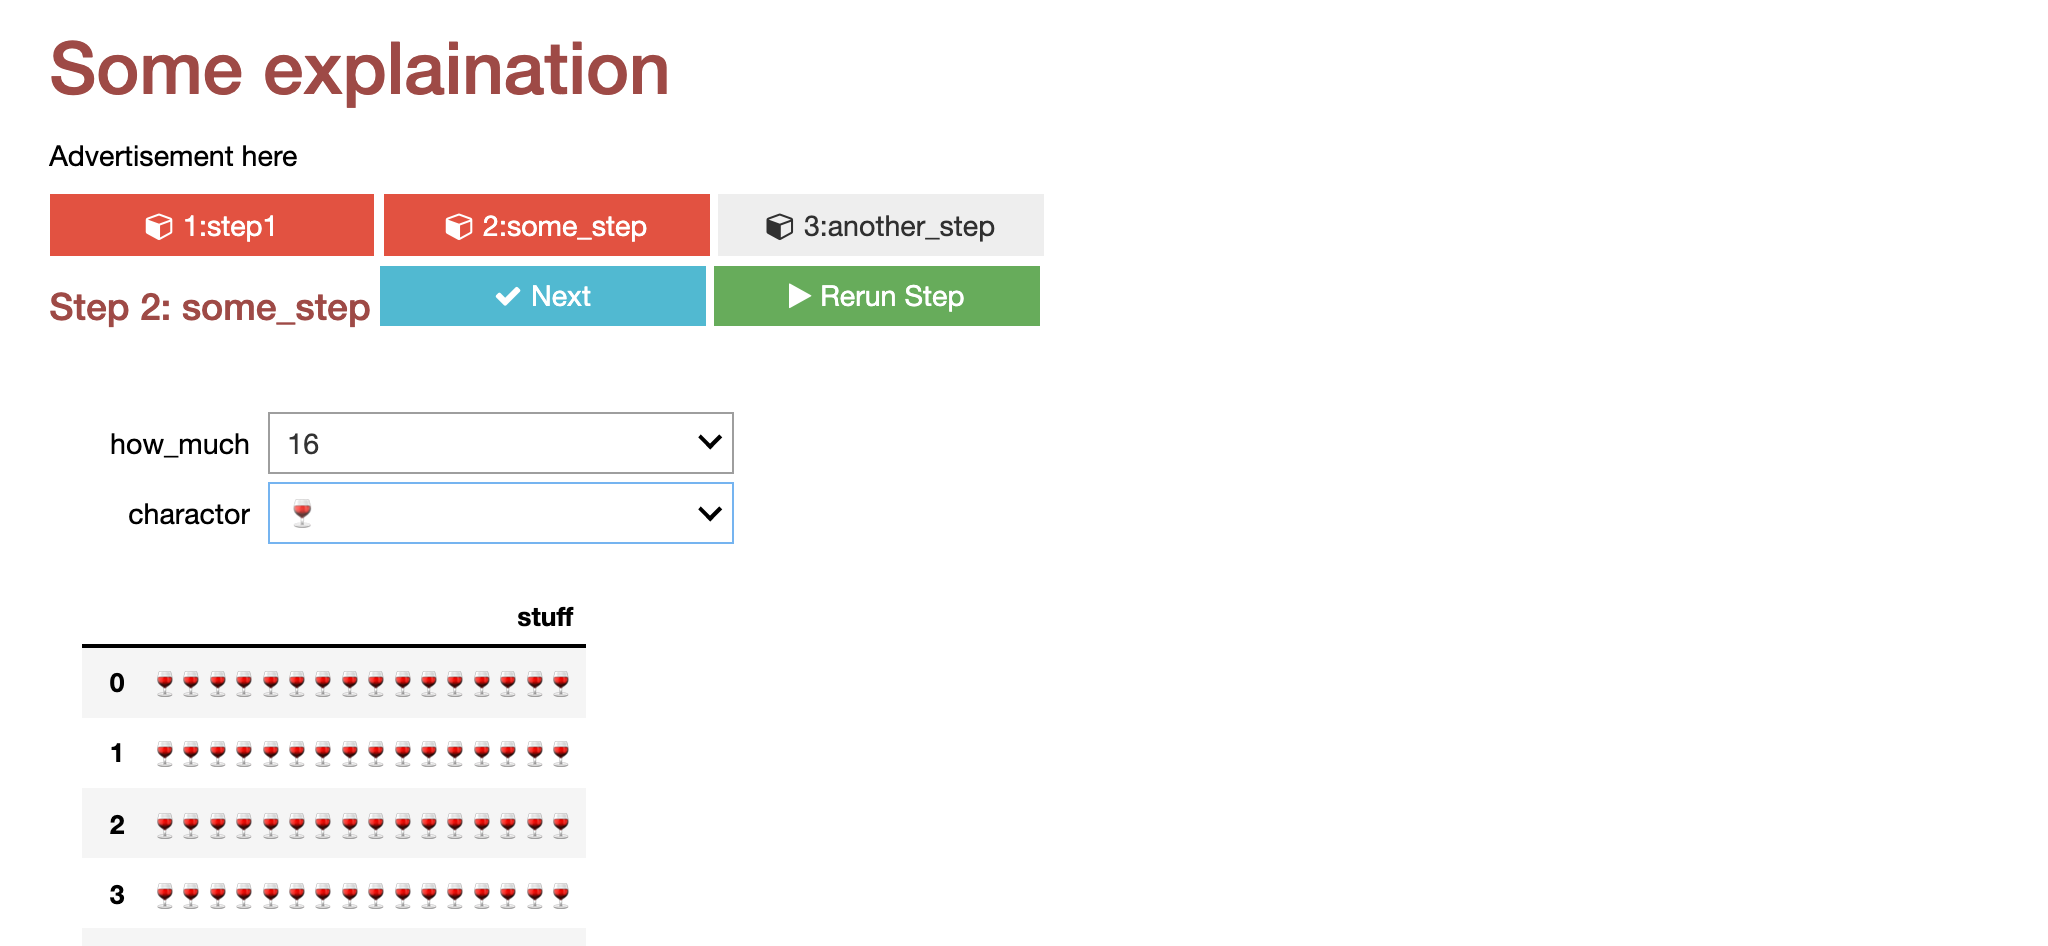